In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [18]:
# Load data
df = pd.read_csv("electronic_store_sales.csv")

In [19]:
# Total sales per product
sales_by_product = df.groupby("Product")["Quantity_Sold"].sum().sort_values(ascending=False)
print("Total Sales per Product:")
print(sales_by_product)

Total Sales per Product:
Product
Smartphone X1                7805
LED Desk Lamp Pro            7140
Power Bank Ultra 10000mAh    5407
Laptop Charger Type-C        5315
Wireless Earphone Pro        5232
Tablet Stand Adjustable      5043
Desk Fan CoolBreeze          4911
USB-C Hub 6-in-1             4572
Bluetooth Speaker Mini       2652
Smartwatch Series 5          2616
Name: Quantity_Sold, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_23932\2028452681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")


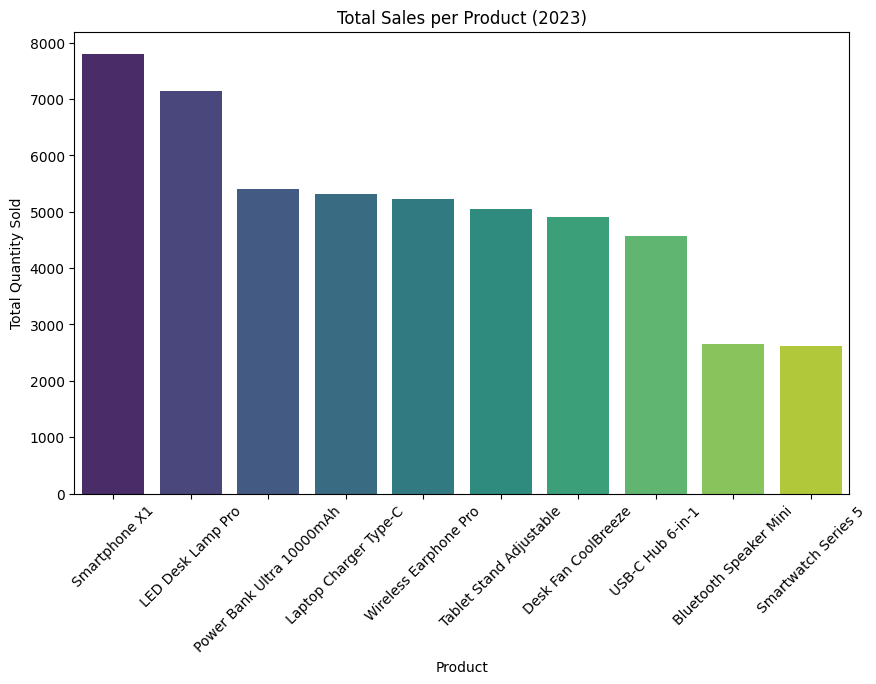

In [20]:
# Visualize sales
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")
plt.title("Total Sales per Product (2023)")
plt.xticks(rotation=45)
plt.ylabel("Total Quantity Sold")
plt.show()

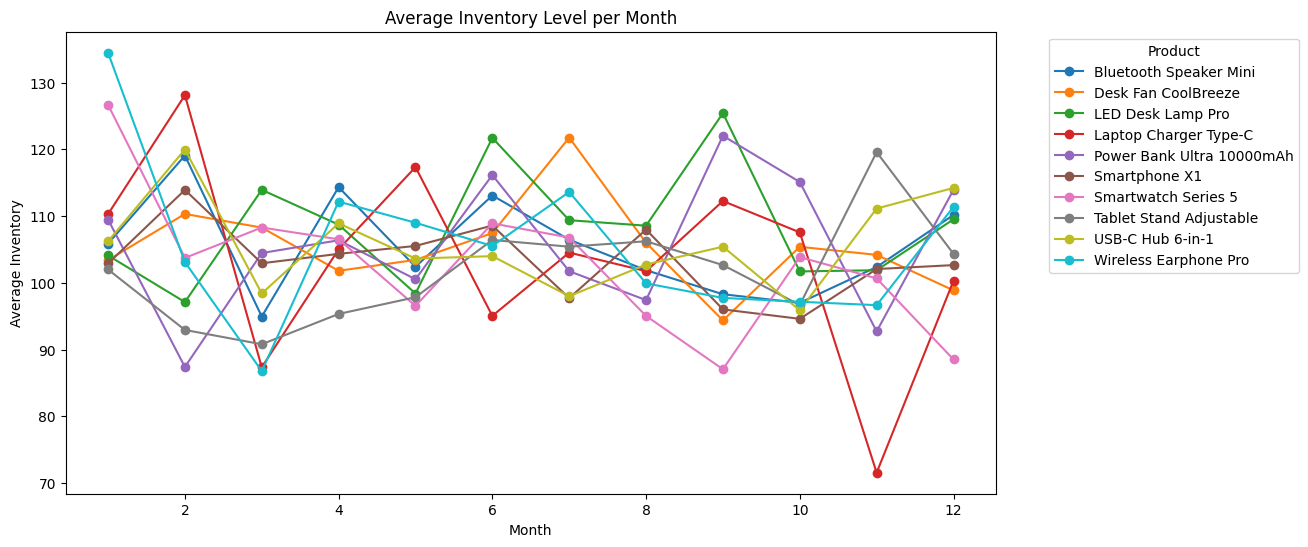

In [21]:
# Inventory analysis
inventory_by_month = df.groupby(["Month", "Product"])["Inventory_Level"].mean().unstack()
inventory_by_month.plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Average Inventory Level per Month")
plt.ylabel("Average Inventory")
plt.xlabel("Month")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1))
plt.show()

Demand Forecasting (Time Series)
Use moving average to predict demand:

In [22]:
# Calculate moving average for demand forecasting
df["Moving_Average"] = df.groupby("Product")["Quantity_Sold"].transform(
    lambda x: x.rolling(window=30, min_periods=1).mean()
)

In [23]:
# Example of forecast results
print(df[["Date", "Product", "Quantity_Sold", "Moving_Average"]].head(10))

         Date                    Product  Quantity_Sold  Moving_Average
0  2023-04-13  Power Bank Ultra 10000mAh             10            10.0
1  2023-12-15              Smartphone X1             15            15.0
2  2023-09-28      Wireless Earphone Pro             14            14.0
3  2023-04-17        Smartwatch Series 5              4             4.0
4  2023-03-13           USB-C Hub 6-in-1              2             2.0
5  2023-07-08              Smartphone X1             12            13.5
6  2023-01-21  Power Bank Ultra 10000mAh              1             5.5
7  2023-04-13        Desk Fan CoolBreeze              5             5.0
8  2023-05-02              Smartphone X1              6            11.0
9  2023-08-03      Wireless Earphone Pro             11            12.5


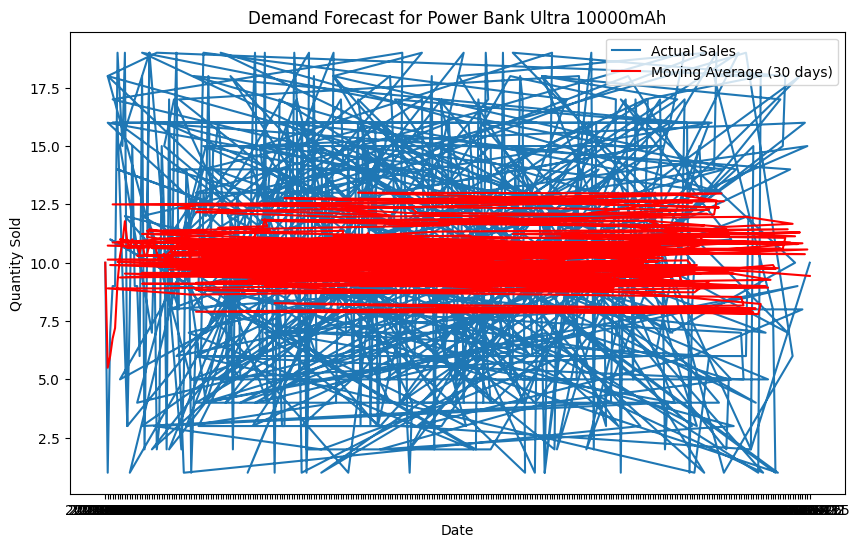

In [24]:
# Visualize forecast for one product
product_example = "Power Bank Ultra 10000mAh"
product_data = df[df["Product"] == product_example]

plt.figure(figsize=(10, 6))
plt.plot(product_data["Date"], product_data["Quantity_Sold"], label="Actual Sales")
plt.plot(product_data["Date"], product_data["Moving_Average"], label="Moving Average (30 days)", color="red")
plt.title(f"Demand Forecast for {product_example}")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.legend()
plt.show()

In [25]:
# EOQ parameters
holding_cost = 2  # Holding cost per unit per year
order_cost = 50   # Ordering cost per order

# Calculate EOQ for each product
def calculate_eoq(demand, order_cost, holding_cost):
    return np.sqrt((2 * demand * order_cost) / holding_cost)

annual_demand = df.groupby("Product")["Quantity_Sold"].sum()
eoq = annual_demand.apply(lambda x: calculate_eoq(x, order_cost, holding_cost))

print("Economic Order Quantity (EOQ) per Product:")
print(eoq)

Economic Order Quantity (EOQ) per Product:
Product
Bluetooth Speaker Mini       364.142829
Desk Fan CoolBreeze          495.530019
LED Desk Lamp Pro            597.494770
Laptop Charger Type-C        515.509457
Power Bank Ultra 10000mAh    519.951921
Smartphone X1                624.699928
Smartwatch Series 5          361.662826
Tablet Stand Adjustable      502.145397
USB-C Hub 6-in-1             478.121324
Wireless Earphone Pro        511.468474
Name: Quantity_Sold, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_23932\4267648581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eoq.index, y=eoq.values, palette="magma")


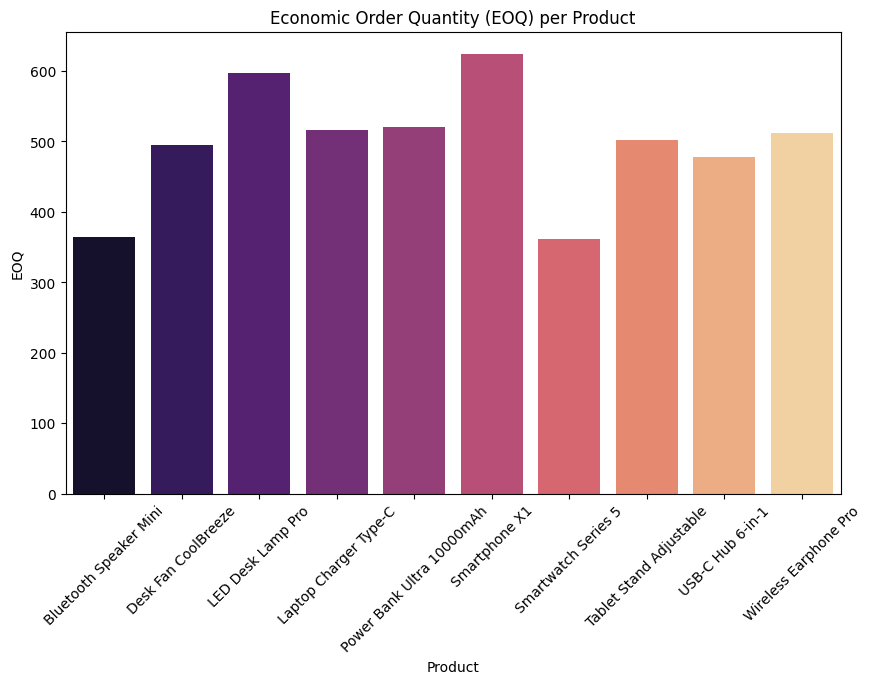

In [26]:

# Visualize EOQ
plt.figure(figsize=(10, 6))
sns.barplot(x=eoq.index, y=eoq.values, palette="magma")
plt.title("Economic Order Quantity (EOQ) per Product")
plt.xticks(rotation=45)
plt.ylabel("EOQ")
plt.show()

In [27]:
for product, eoq_value in eoq.items():
    print(f"Recommendation for {product}: Order {round(eoq_value)} units each time you place an order.")

Recommendation for Bluetooth Speaker Mini: Order 364 units each time you place an order.
Recommendation for Desk Fan CoolBreeze: Order 496 units each time you place an order.
Recommendation for LED Desk Lamp Pro: Order 597 units each time you place an order.
Recommendation for Laptop Charger Type-C: Order 516 units each time you place an order.
Recommendation for Power Bank Ultra 10000mAh: Order 520 units each time you place an order.
Recommendation for Smartphone X1: Order 625 units each time you place an order.
Recommendation for Smartwatch Series 5: Order 362 units each time you place an order.
Recommendation for Tablet Stand Adjustable: Order 502 units each time you place an order.
Recommendation for USB-C Hub 6-in-1: Order 478 units each time you place an order.
Recommendation for Wireless Earphone Pro: Order 511 units each time you place an order.
